In [259]:
#import necessary libraries

import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns

1) Load in the data set (Netflix)

In [260]:
netflix = pd.read_csv('netflix_titles.csv')
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


2) Check for missing values

In [261]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

3) Check for an overview of the data

In [262]:
netflix.info()   #.info() shows us the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [263]:
netflix.shape   #.shape give the number of rows and columns in our data

(8807, 12)

In [264]:
netflix.describe()   #.describe() generates the descriptive statistics of columns containing numerical data.

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [265]:
netflix.columns   #.columns displays the title name of each column in the dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

4) Drop the few null rows in Date added, rating and duration columns respectively

In [266]:
netflix.dropna(subset = ['date_added', 'rating', 'duration'], inplace = True)

#dropna() method is used to remove missing values from the netflix dataframe. 
#'subset' parameter specifies the columns to consider when looking for missing values; in this case, 'date_added', 'rating', and 'duration'.
#inplace parameter set to True means that the original netflix dataframe is modified in place, without creating a copy. 
#resulting df contains only the rows with non-missing values in the specified columns.

In [267]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

5) Fill in the null rows in director, cast and country column with (“None Specified”, “None listed” and “Non Specified “) respectively

In [268]:
netflix.fillna({'director': 'None Specified', 'cast': 'None listed', 'country': 'Non specified'}, inplace = True)

6) Recheck for missing values

In [269]:
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

7) Check the value count for Duration column

In [270]:
netflix.value_counts(subset = ['duration']).sum()

8790

8) Check the value count for type column

In [271]:
netflix.value_counts(subset = ['type']).sum()

8790

9) Using pie chart in matplotlib visualize the type column (Movie and TV Show)

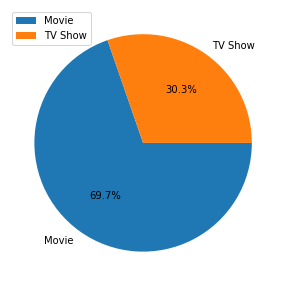

In [272]:
plt.figure(figsize = (5,5))
plt.pie(x = netflix.value_counts('type'), labels = ['Movie', 'TV Show'], autopct = '%1.1f%%', counterclock= False)
plt.legend()
plt.show()

10) Subset the data to only include Movies in the type Column

In [298]:
netflix[netflix['type'] == 'Movie'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


11) Get the counts of directors in the dataset

In [274]:
netflix['director'].nunique()

4527

12) Visualize the top movies directors

In [301]:
netflix['director'].value_counts()

None Specified                    2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [276]:
movies = netflix[netflix['type'] == 'Movie']

top_dir = movies[movies['director'] != 'None Specified']['director'].value_counts().head(5)
top_dir

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Name: director, dtype: int64

In [277]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Text(0.5, 1.0, 'The Top 5 Directors')

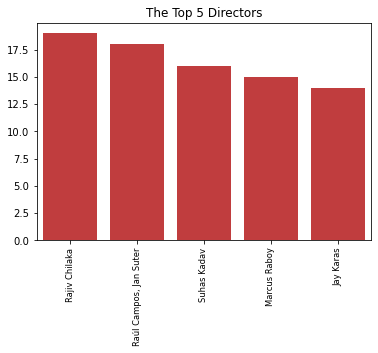

In [278]:
base_color = sns.color_palette()[3]
sns.barplot(x = top_dir.index, y = top_dir.values, orient='v', color= base_color)
plt.xticks(rotation = 90, fontsize = 'small')
plt.title('The Top 5 Directors')

13) Check for outliers in the duration column

In [279]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [280]:
movies_new = movies.copy() #creates a shallow copy of the movies dataframe and assigns it to the variable movies_new.
movies_new['duration_num'] = movies_new['duration'].str.split().str[0] #creates a new column 'duration_num' in the movies dataframe and assigns the first element (index 0) of the result of splitting each element in the 'duration' column by whitespace to the corresponding row of the new column.
movies_new['duration_num'] = pd.to_numeric(movies_new['duration_num']) #converts the data type of the 'duration_num' column from string to numeric (either int or float).
movies_new['duration_num'].dtype #returns the data type of the 'duration_num' column.
movies_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [281]:
movies_new.loc[:, 'duration_num'] = movies_new['duration'].str.split().str[0]
movies_new['duration_num'] = pd.to_numeric(movies_new['duration_num']) #converts the data type of the 'duration_num' column from string to numeric (either int or float).
movies_new['duration_num'].dtype #returns the data type of the 'duration_num' column.
movies_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [282]:
#to find outliers, we find the lower boundary value & the upper boundary value and any value below and beyond them respectively are considered outliers 
#lower_boundary = q1 - (1.5 * iqr)
#upper_boundary = q3 + (1.5 * iqr)
#interquartile range - iqr = q3 - q1

q1 = np.quantile(movies_new["duration_num"], 0.25) #to get the first quartile
q3 = np.quantile(movies_new["duration_num"], 0.75) #to get the third quartile
iqr = q3 - q1
print(q1, q3, iqr)

87.0 114.0 27.0


In [283]:
lower_boundary = q1 - (1.5 * iqr)
upper_boundary = q3 + (1.5 * iqr)
print(lower_boundary, upper_boundary)

46.5 154.5


In [284]:
outliers = movies_new[(movies_new["duration_num"] < lower_boundary) |(movies_new["duration_num"] > upper_boundary)]['duration']
outliers.value_counts().sum()

449

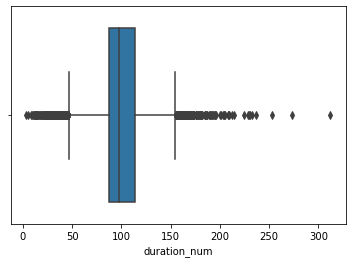

In [285]:
#now to visualize
#Notice the lower and upper bounds we calculated (46.5 154.5)
sns.boxplot(x = movies_new['duration_num'], orient = 'h');

In [286]:
#we do the same for tv shows

shows = netflix[netflix['type']== 'TV Show']
shows['duration'].value_counts()

1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

In [287]:
shows_new = shows.copy() # create a copy of shows df
shows_new['duration_num'] = shows.loc[:, 'duration'].str[:2]
shows_new['duration_num'] = pd.to_numeric(shows_new['duration_num']) #converting the new column to a numeric column
shows_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
1,s2,TV Show,Blood & Water,None Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Non specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,None Specified,None listed,Non specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,None Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Non specified,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1


In [288]:
q1 = np.quantile(shows_new["duration_num"], 0.25) #to get the first quartile
q3 = np.quantile(shows_new["duration_num"], 0.75) #to get the third quartile
iqr = q3 - q1
print(q1, q3, iqr)

1.0 2.0 1.0


In [289]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print (lower_bound, upper_bound)

-0.5 3.5


14) What are the top countries by movies counts

In [290]:
movie_countries = movies[movies['country'] != 'Non specified']
top_countries = movie_countries['country'].value_counts().reset_index().rename(columns = {'index': 'Country', 'country': 'Count'}).head()
top_countries

,Country,Count
0,United States,2055
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97


15) Visualize the top countries by movie count

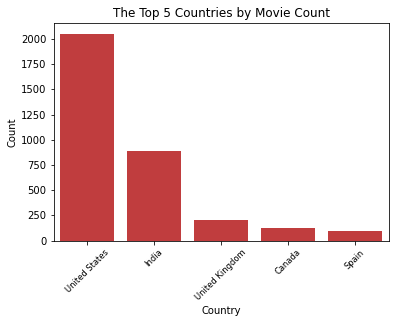

In [291]:
sns.barplot(x = top_countries.Country, y = top_countries.Count, color = base_color)
plt.xticks(rotation = 45, fontsize= 'small')
plt.title('The Top 5 Countries by Movie Count')
plt.show()

16) Select movies type that are been released in the last 10 year (where years >=2012)

In [292]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Non specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None Specified,None listed,Non specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [293]:
series = netflix[netflix['type']== 'TV Show']
series_last_10_years = series[series['release_year'] >= 2012]
movies_last_10_years = movies[movies['release_year'] >= 2012 ]
count_of_movies = movies_last_10_years.shape[0]
count_of_series = series_last_10_years.shape[0]

In [294]:
movies_last_10_years.value_counts().sum()

4675

17) Using bar plot, show the count of movies and series produced in the last 10 years (where years >= 2012)

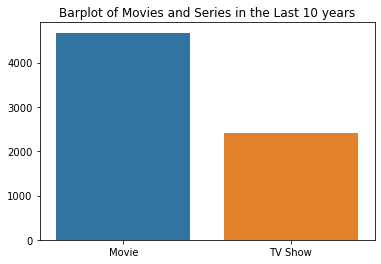

In [295]:
sns.barplot(x=['Movie', 'TV Show'], y=[count_of_movies, count_of_series])
plt.title('Barplot of Movies and Series in the Last 10 years')
plt.show()

18) Using a count plot show the total movies and TV show been released in the last 10 years


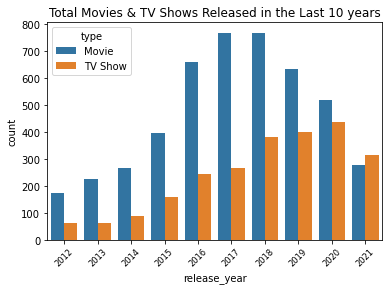

In [296]:
#a subplot having 1 row & 2 columns is first created
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot the first countplot in the first subplot
#sns.countplot(x= 'release_year', data = movies_last_10_years, ax=ax1)
#ax1.set_title('Total Movies Released in the Last 10 years')
#ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, fontsize = 'small')

# plot the second countplot in the second subplot
#sns.countplot(x= 'release_year', data = series_last_10_years, ax=ax2)
#ax2.set_title('Total TV Shows Released in the Last 10 years')
#ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45, fontsize = 'small')

# add a title to the plot
#fig.suptitle("Title of the plot") - this is for 2 plot with one title

#option 2 below which I find more suitable
last_10_years_total = netflix[netflix['release_year'] >= 2012]
sns.countplot(x= 'release_year', data = last_10_years_total, hue = 'type')
plt.xticks(rotation=45, fontsize = 'small')
plt.title('Total Movies & TV Shows Released in the Last 10 years')
plt.show()

19) Check for unique rating

In [297]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

20) Explore the data